In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# os.chdir('drive/My Drive/Datasets/')
os.listdir()

['heart.csv',
 'iris.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv',
 'housing.csv',
 'winequality-white.csv',
 'auto.csv']

In [ ]:
dataset = pd.read_csv('winequality-white.csv', delimiter = ';')


In [ ]:
dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# dataset.corr()

In [ ]:
# sb.set_style("whitegrid");
# sb.pairplot(dataset, hue="medv", height=3);
# plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a6815b0f0>,
      dtype=object)

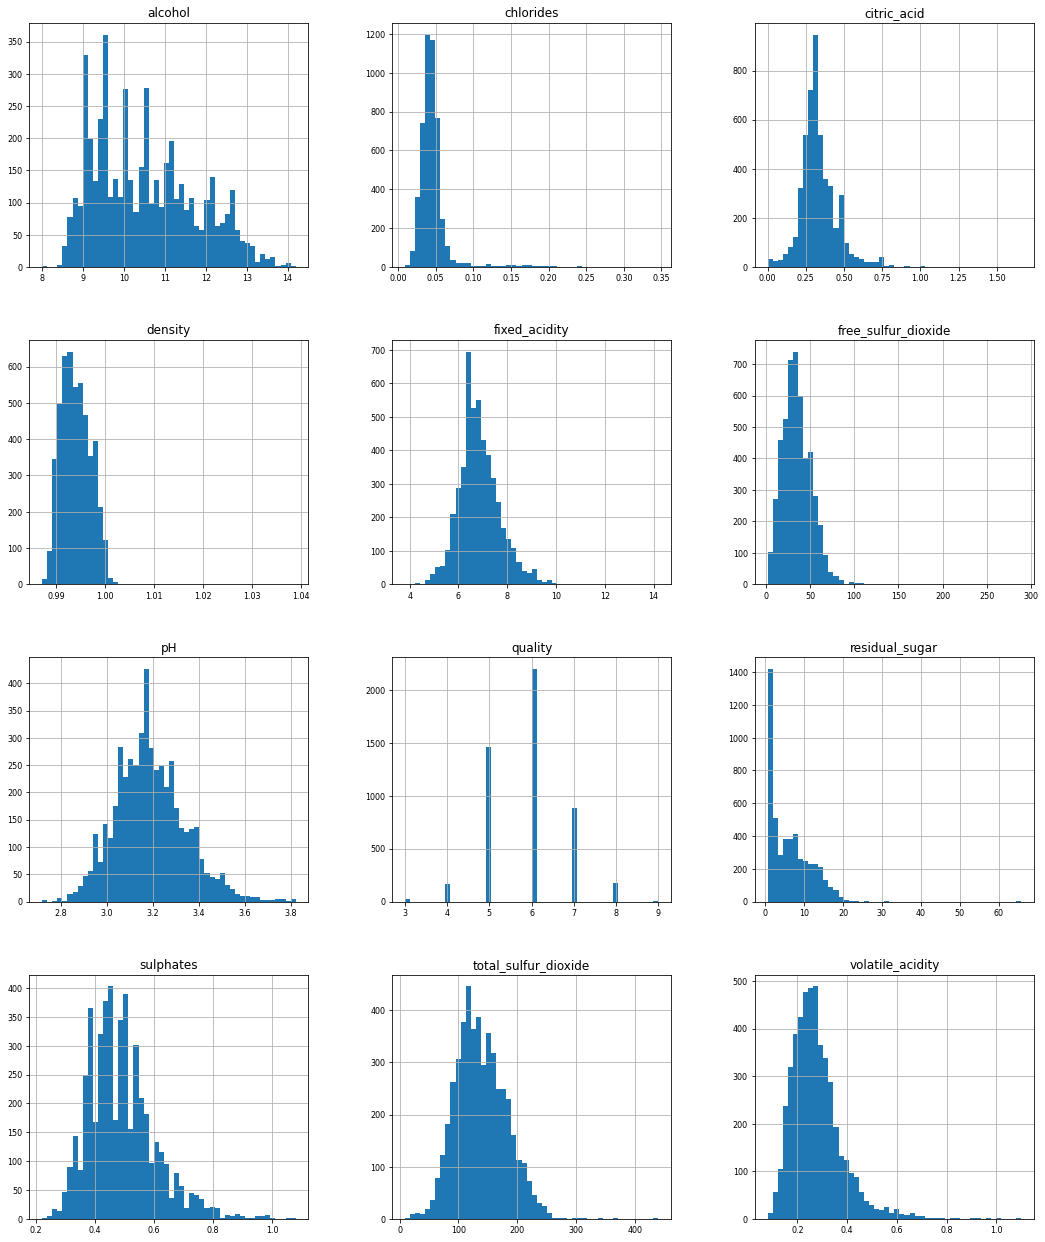

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
dataset.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
dataset.corr()['quality'][:-1]

fixed_acidity          -0.113663
volatile_acidity       -0.194723
citric_acid            -0.009209
residual_sugar         -0.097577
chlorides              -0.209934
free_sulfur_dioxide     0.008158
total_sulfur_dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

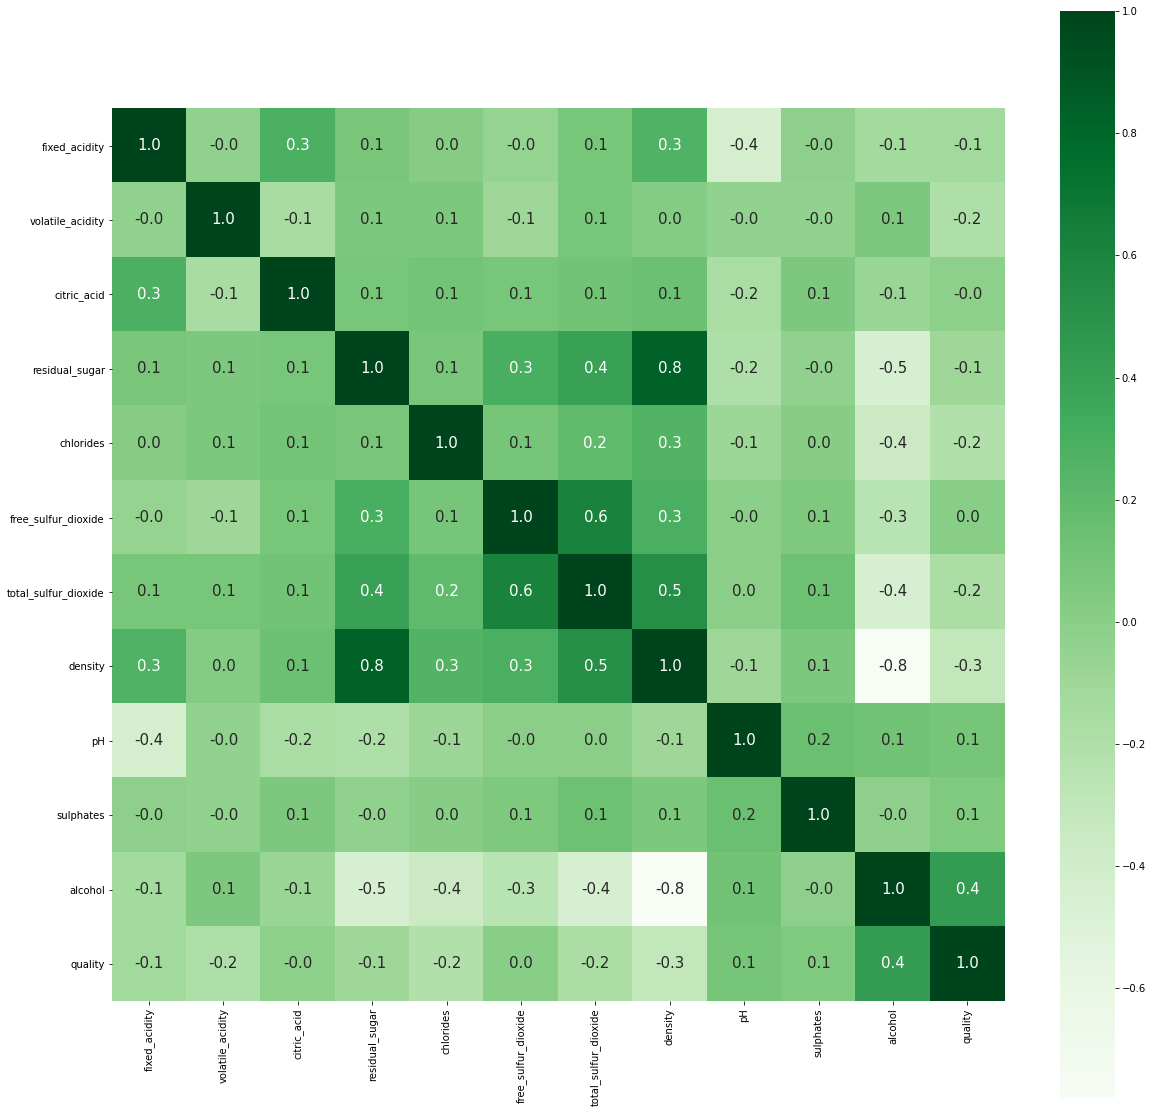

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
feature = dataset.drop(['quality'], axis=1)
label = dataset['quality']

In [ ]:
scaler = QuantileTransformer()

feature_scaled = scaler.fit_transform(feature.values) 
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=10)

In [ ]:
def preproces(type_of_transform):
  scaler = type_of_transform

  feature_scaled = scaler.fit_transform(feature.values) 
  feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=10)
  
  lin_reg = LinearRegression()
  lin_reg.fit(feature_train, label_train)

  predictions = lin_reg.predict(feature_test)

  print("\nprediksi menggunakan ", type_of_transform)
  # print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
  print("r2 score")
  print(r2_score(label_test, predictions))
  print("RMSE")
  print(np.sqrt(mean_squared_error(label_test, predictions)))


In [ ]:
preproces(StandardScaler())


prediksi menggunakan  StandardScaler(copy=True, with_mean=True, with_std=True)
r2 score
0.2894540453148069
RMSE
0.7449048928691178


In [ ]:
preproces(PowerTransformer())


prediksi menggunakan  PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
r2 score
0.29148480551138856
RMSE
0.7438396517011734


In [ ]:
preproces(QuantileTransformer())


prediksi menggunakan  QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)
r2 score
0.2958270002311757
RMSE
0.7415568068669044


In [ ]:
preproces(MinMaxScaler())


prediksi menggunakan  MinMaxScaler(copy=True, feature_range=(0, 1))
r2 score
0.289454045314806
RMSE
0.7449048928691182


In [ ]:
preproces(MaxAbsScaler())


prediksi menggunakan  MaxAbsScaler(copy=True)
r2 score
0.289454045314814
RMSE
0.744904892869114


In [ ]:
preproces(RobustScaler())


prediksi menggunakan  RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
r2 score
0.2894540453148069
RMSE
0.7449048928691178


In [ ]:
preproces(power_transform(feature,method='box-cox'))

Untuk hasil dari beberapa metode transformasi nilai akurasi nya hampir sama semua untuk metode **StandardScaler(), RobustScaler(), MaxAbsScaler(), MinMaxScaler()** yaitu **0.2894**, sedangkan untuk metode **yeo-johnson** nilai akurasi nya sedikit lebih tinggi yaitu **0.2914** dan nilai akurasi yang paling tinggi didapatkan dengan menggunakan metode **QuantileTransformer()** yaitu **0.2958**.
Untuk Metode **Box Cox Transformation** mengalami error karena metode ini hanya bisa digunakan pada data yang positif sedangkan angka 0 tidak dapat benar benar dikatakan positif maupun negatif. .

In [ ]:
#Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=400, bootstrap=True, max_features = "sqrt",max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_leaf_nodes=None, random_state=10)
random_forest.fit(feature_train, label_train)

predictions = random_forest.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = random_forest.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.9341273036313185
RMSE
0.22739717356196296

prediksi menggunakan testing set
r2 score
0.5621033607384655
RMSE
0.5847773560274449


In [ ]:
#XGBoost
xgb_model = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=400, verbosity=1, objective='reg:squarederror', booster='gbtree',)
xgb_model.fit(feature_train, label_train)

predictions = xgb_model.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = xgb_model.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.6454421876205066
RMSE
0.5275648734782311

prediksi menggunakan testing set
r2 score
0.4328202391529794
RMSE
0.6655261183397152


In [ ]:
#SVM Regressor
svm_reg = SVR(kernel='rbf', C=50.0)
svm_reg.fit(feature_train, label_train)

predictions = svm_reg.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = svm_reg.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.8109368072785145
RMSE
0.3852439575993991

prediksi menggunakan testing set
r2 score
0.2994027596984986
RMSE
0.7396716141933235


In [ ]:
#KNN Regressor
knn = KNeighborsRegressor(n_neighbors=11, leaf_size=30, p=2, n_jobs=None, algorithm='auto')
knn.fit(feature_train, label_train)

predictions = knn.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = knn.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.46118091124038185
RMSE
0.6503600090946873

prediksi menggunakan testing set
r2 score
0.3669173005611487
RMSE
0.7031289249061197


Nilai **r2score** yang paling tinggi didapatkan dengan menggunakan algoritma **Random Forest Regressor** yaitu **0.5621** dan nilai **RMSE 0.5847**.